# Regex 2

In [1]:
#import statements
import re
from subprocess import check_output
import pandas as pd

In [2]:
# Example strings
# from DS100 book...
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯"])
print(s1)

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)
"""
print(s2)

s3 = "In CS 320, there are 8 quizzes, 7 projects, 38 lectures, and 1000 things to learn.  CS 320 is awesome!"
print(s3)

s4 = """In CS 320,  there are 8 quizzes,    7 projects,
38 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :) ¯\_(ツ)_/¯
1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
1-123-4567 (not a phone number)

In CS 320, there are 8 quizzes, 7 projects, 38 lectures, and 1000 things to learn.  CS 320 is awesome!
In CS 320,  there are 8 quizzes,    7 projects,
38 lectures, and 1000 things to learn.  CS 320 is awesome!


### `re` module
- `re.findall(<PATTERN>, <SEARCH STRING>)`: regular expression matches
    - returns a list of strings 
- `re.sub(<PATTERN>, <REPLACEMENT>, <SEARCH STRING>)`: regular expression match + substitution
    - returns a new string with the substitutions (remember strings are immutable)

#### Find all digits.

In [3]:
re.findall(r"\d+", s4)

['320', '8', '7', '38', '1000', '320']

### Groups
- we can capture matches using `()` => this is the special meaning of `()`
- returns a list of tuples, where length of the tuple will be number of groups

#### Find all digits and the word that comes after that.

In [4]:
matches = re.findall(r"(\d+) (\w+)", s4)
matches

[('8', 'quizzes'),
 ('7', 'projects'),
 ('38', 'lectures'),
 ('1000', 'things'),
 ('320', 'is')]

#### Goal: make a dict (course component => count, like "projects" => 7)

In [5]:
course_dict = {}
for count, component in matches:
    course_dict[component] = int(count)
course_dict

{'quizzes': 8, 'projects': 7, 'lectures': 38, 'things': 1000, 'is': 320}

### You can have nested groups

#### Find and group all digits and the word that comes after that.

In [6]:
re.findall(r"((\d+) (\w+))", s4)

[('8 quizzes', '8', 'quizzes'),
 ('7 projects', '7', 'projects'),
 ('38 lectures', '38', 'lectures'),
 ('1000 things', '1000', 'things'),
 ('320 is', '320', 'is')]

#### Substitute all digits with "###".

In [7]:
re.sub(r"\d+", "###", s3)

'In CS ###, there are ### quizzes, ### projects, ### lectures, and ### things to learn.  CS ### is awesome!'

#### Goal: normalize whitespace (everything will be a single space)

In [8]:
print(s4)

In CS 320,  there are 8 quizzes,    7 projects,
38 lectures, and 1000 things to learn.  CS 320 is awesome!


In [9]:
re.sub(r"\s+", " ", s4)

'In CS 320, there are 8 quizzes, 7 projects, 38 lectures, and 1000 things to learn. CS 320 is awesome!'

### How to use groups for substitution?
- `\g<N>` gives you the result of the N'th grouping.

#### Substitute all course component counts with HTML bold tags.

In [10]:
print(re.sub(r"(\d+)", "<b>\g<1></b>", s3))

In CS <b>320</b>, there are <b>8</b> quizzes, <b>7</b> projects, <b>38</b> lectures, and <b>1000</b> things to learn.  CS <b>320</b> is awesome!


In CS <b>320</b>, there are <b>40</b> lectures, <b>10</b> quizzes, <b>3</b> exams, <b>7</b> projects, and <b>1000</b> things to learn. CS <b>320</b> is awesome!

### Git log example

Goal: analyze the git repository for the flask package:
https://github.com/pallets/flask/ 

#### Run `git log` as a shell command

In [11]:
git_log_output = str(check_output(["git", "log"], cwd="../../flask"), encoding="utf-8")
print(git_log_output[:500])

commit cb825687a592709f902f3d320d93987a0546fd28
Merge: 51bf0fdd 1ce4d95d
Author: David Lord <davidism@gmail.com>
Date:   Sat Jul 1 09:24:20 2023 -0700

    Bump actions/checkout from 3.5.2 to 3.5.3 (#5186)

commit 51bf0fdd9018d63b7bc09db52a66b726c2c4bad8
Merge: 0da5788e 1fb18863
Author: David Lord <davidism@gmail.com>
Date:   Sat Jul 1 09:24:11 2023 -0700

    Bump slsa-framework/slsa-github-generator from 1.6.0 to 1.7.0 (#5185)

commit 0da5788efbda92b6b6239352c2b9a835efe0888f
Merge: 326484a8 f6


#### GOAL: find all the commit numbers

In [12]:
commits = re.findall(r"[0-9a-f]{40}", git_log_output)
# recent 10 commit numbers
commits[:10]

['cb825687a592709f902f3d320d93987a0546fd28',
 '51bf0fdd9018d63b7bc09db52a66b726c2c4bad8',
 '0da5788efbda92b6b6239352c2b9a835efe0888f',
 '326484a8d107c3af490d7d294c17832afabae785',
 '1ce4d95de92fdd9423c295bf9b63117817fab3bf',
 '8e5e7e5ab8b370d6c329ec480221332ada57f0ab',
 'c85c95e3d7251135ab7dc9ce3241c5835cc595a9',
 '1fb188636e6a21e9c1fefdf4dd8c671dd3f332d6',
 'f62580b947e3be4d8b5ef5fa486d1472884aacd5',
 'c1b35aecc5cdb1a34539d14196df55838bb2f836']

#### Which day of the week do the programmers push to the repo most frequently?

In [13]:
days = re.findall(r"Date:\s+(\w+)", git_log_output)
days[:30]

['Sat',
 'Sat',
 'Sat',
 'Sat',
 'Sat',
 'Sat',
 'Sat',
 'Sat',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Tue',
 'Wed',
 'Wed',
 'Fri',
 'Fri',
 'Fri',
 'Fri',
 'Thu',
 'Thu',
 'Wed',
 'Wed']

#### Count unique days

In [14]:
day_counts = pd.Series(days).value_counts()
day_counts

Mon    906
Thu    787
Tue    735
Wed    730
Fri    708
Sun    693
Sat    559
dtype: int64

#### Sort by day of the week

In [15]:
sorted_day_counts = day_counts.loc[["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]]
sorted_day_counts

Mon    906
Tue    735
Wed    730
Thu    787
Fri    708
Sat    559
Sun    693
dtype: int64

#### Create a bar plot

<AxesSubplot:xlabel='Days of the week', ylabel='Commit counts'>

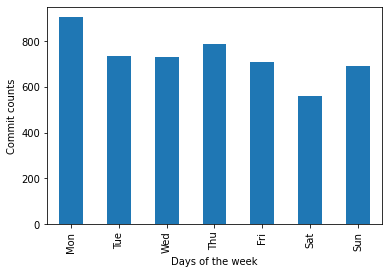

In [16]:
sorted_day_counts.plot.bar(
    ylabel = "Commit counts", 
    xlabel = "Days of the week")

#### Find all commit autho names.

In [17]:
authors = re.findall(r"Author:\s+(.+?)\s*<", git_log_output)
author_count = {}
for a in authors:
    if a not in author_count:
        author_count[a] = 0
    author_count[a] += 1
pd.Series(author_count)

David Lord            1509
dependabot[bot]         40
mohammad m. moniri       1
pre-commit-ci[bot]      29
Jeroendevr               1
                      ... 
unknown                  2
Sebastien Estienne       3
cgrinds                  2
Chris Edgemon            1
moraes                   1
Length: 816, dtype: int64

### Find commits that are related to the 2.x.x releases

In [18]:
re.findall(r"(.*2\.\d\.(\d|x).*)", git_log_output)[:50]

[("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ('    update werkzeug to 2.3.5', '5'),
 ('    start version 2.3.3', '3'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ('    In the API docs using a TOML file to load config is referred to as https://flask.palletsprojects.com/en/2.3.x/api/#flask.Config.from_file',
  'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.3.x'", 'x'),
 ("    Merge branch '2.2.x' into 2.3.x", 'x'),
 ('    Merge pull request #5110 from pallets/release-2.2.5', '5'),
 ('    release version 2.2.5', '5'),
 ('    release version 2.2.5', '5'),
 ('    backport 2.2.x: set `Vary: Cookie` header consistently for session',
  'x'),
 ('    werkzeug 2.3.3 compatibility', '3'),
 ('    werkzeug 2.3.3 

### Emails example

In [19]:
s = """
Yiyin [Instructor] - yshen82 (AT) wisc.edu
Victor (TA): vsuciu@wisc.edu 
Evie (Peer Mentor) - ebrowning2 [at]wisc.edu
"""
print(s)


Yiyin [Instructor] - yshen82 (AT) wisc.edu
Victor (TA): vsuciu@wisc.edu 
Evie (Peer Mentor) - ebrowning2 [at]wisc.edu



In [20]:
name = r"\w+"
at = r"@|[\(\[][Aa][Tt][\)\]]"
domain = r"\w+\.(edu|com|org|net|io|gov)"

full_regex = f"\s+({name})\s*({at})\s*({domain})"

re.findall(full_regex, s)

[('yshen82', '(AT)', 'wisc.edu', 'edu'),
 ('vsuciu', '@', 'wisc.edu', 'edu'),
 ('ebrowning2', '[at]', 'wisc.edu', 'edu')]

In [21]:
print("REGEX:", full_regex)
for match in re.findall(full_regex, s):
    print(f"{match[0]}@{match[3]}")

REGEX: \s+(\w+)\s*(@|[\(\[][Aa][Tt][\)\]])\s*(\w+\.(edu|com|org|net|io|gov))
yshen82@edu
vsuciu@edu
ebrowning2@edu
